In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib


In [11]:
import pandas as pd

df = pd.read_csv('../data/nasa/battery_data.csv')
df.head()


,Voltage_measured,Current_measured,Temperature_measured,Current_load,Voltage_load,Time
0,4.246711,0.000252,6.212696,0.0002,0.000,0.000
1,4.246764,-0.001411,6.234019,0.0002,4.262,9.360
2,4.039277,-0.995093,6.250255,1.0000,3.465,23.281
3,4.019506,-0.996731,6.302176,1.0000,3.451,36.406
4,4.004763,-0.992845,6.361645,1.0000,3.438,49.625


In [18]:
df = df[['Voltage_measured',
         'Current_measured',
         'Temperature_measured',
         'Time']]


In [24]:
df.columns = ['Voltage', 'Current', 'Temperature', 'Time']
df.head()


,Voltage,Current,Temperature,Time
0,4.246711,0.000252,6.212696,0.000
1,4.246764,-0.001411,6.234019,9.360
2,4.039277,-0.995093,6.250255,23.281
3,4.019506,-0.996731,6.302176,36.406
4,4.004763,-0.992845,6.361645,49.625


In [25]:
# SOC approximation using time normalization
df['SOC'] = (df['Time'].max() - df['Time']) / df['Time'].max() * 100


In [26]:
df = df[['Voltage', 'Current', 'Temperature', 'SOC']]
df.head()


,Voltage,Current,Temperature,SOC
0,4.246711,0.000252,6.212696,100.000000
1,4.246764,-0.001411,6.234019,99.854571
2,4.039277,-0.995093,6.250255,99.638277
3,4.019506,-0.996731,6.302176,99.434350
4,4.004763,-0.992845,6.361645,99.228963


In [27]:
df.to_csv('../data/nasa/clean_nasa_soc_data.csv', index=False)


In [28]:


data = pd.read_csv('../data/nasa/clean_nasa_soc_data.csv')
data.head()


,Voltage,Current,Temperature,SOC
0,4.246711,0.000252,6.212696,100.000000
1,4.246764,-0.001411,6.234019,99.854571
2,4.039277,-0.995093,6.250255,99.638277
3,4.019506,-0.996731,6.302176,99.434350
4,4.004763,-0.992845,6.361645,99.228963


In [19]:
X = data[['Voltage', 'Current', 'Temperature']]
y = data['SOC']


In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [21]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)


RandomForestRegressor()

In [22]:
pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, pred))
rmse


np.float64(0.3499999999999943)

In [29]:
joblib.dump(model, '../models/soc_model.pkl')


['../models/soc_model.pkl']

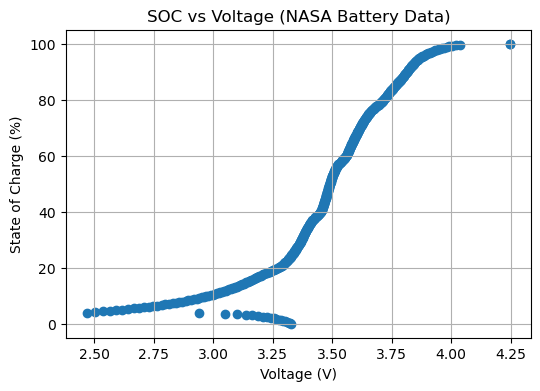

In [30]:
# SOC vs Voltage
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(data['Voltage'], data['SOC'])
plt.xlabel("Voltage (V)")
plt.ylabel("State of Charge (%)")
plt.title("SOC vs Voltage (NASA Battery Data)")
plt.grid(True)
plt.show()


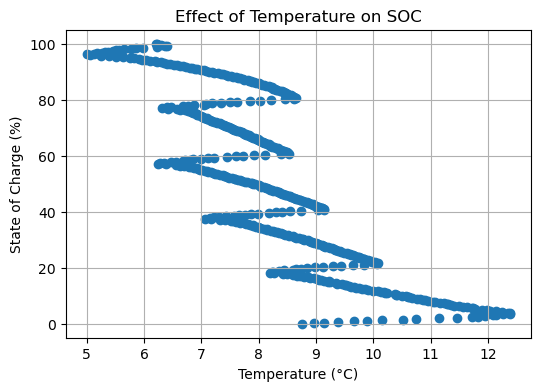

In [31]:
plt.figure(figsize=(6,4))
plt.scatter(data['Temperature'], data['SOC'])
plt.xlabel("Temperature (°C)")
plt.ylabel("State of Charge (%)")
plt.title("Effect of Temperature on SOC")
plt.grid(True)
plt.show()


In [33]:
y_pred = model.predict(X_test)


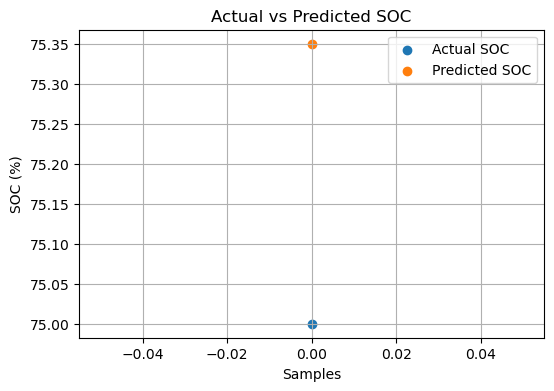

In [35]:
plt.figure(figsize=(6,4))
plt.scatter(range(len(y_test)), y_test.values, label="Actual SOC")
plt.scatter(range(len(y_pred)), y_pred, label="Predicted SOC")
plt.xlabel("Samples")
plt.ylabel("SOC (%)")
plt.title("Actual vs Predicted SOC")
plt.legend()
plt.grid(True)
plt.show()
